<a href="https://colab.research.google.com/github/Mehak-Seetlani/Langchaim---AI-Application/blob/main/Prompting_OpenAI_Models_Langchain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prompting OpenAI Models

In [ ]:
#Normally, using OpenAI's models would require a personal API key used for billing the cost of the models. Here, you do not need to create or provide an OpenAI API key. The "<OPENAI_API_TOKEN>" placeholder will send valid requests to the API. If you make large number of requests in a short period, you may encounter a RateLimitError. If you see this, please pause for a moment and try again.

#Placeholder for API= "<OPENAI_API_TOKEN>"
#langchain_openai = Partner Library
#Class = ChatOpenAI can be used to define a model
from langchain_openai import ChatOpenAI

#This makes a request to the OpenAI API and returns the response back to the application
llm = ChatOpenAI(
    model="gpt-4o-mini",
    api_key='....'
)

#To prompt this model, call the.invole()method
llm.invoke("What is LangChain")

#To print response
print(response.content)

#Open Source models "Hugging Face" (Downloaded locally instead of making a request to an API)
#.from_model_id() can be used to download a model for a particular task; here a text generation model

#There are thousands of models freely available to download and use on Hugging Face. Hugging Face integrates really nicely into LangChain via its partner library, langchain-huggingface, which is available for you to use.

# load and call the crumb/nano-mistral model from Hugging Face. This is a ultra-light LLM designed to be fine-tuned for greater performance.


from langcgain_huggingface import HuggingFacePipeline

llm = HuggingFacePipeline.from_model_id(
    model_id="meta-llama/Llama-3.2-3B-Instruct",
    task="text-generation",
    pipeline_kwargs={"max_new_tokens
    "}
)

#To promt this model, call the.invole()method
llm.invoke("What is HuggingFace")

Difference between response and response.content. In LangChain, when you call .invoke() on a ChatOpenAI model, it returns an object of type AIMessage, which represents the assistant's response **(E.g. AIMessage(content='LangChain is a framework designed to simplify the creation of applications that use LLMs...', additional_kwargs={}, example=False)
LangChain is a framework designed to simplify the creation of applications that use LLMs...)**.  .content is the actual text of the response — the part you'd want to show the user.

Prompt Templates

In [ ]:
#Prompt templates are a fundamental LangCHain component that act as reusable contnet for defining prompts for LLMs. They can contain instructions, examples.
from langchain_core.prompts import PromptTemplate
template = "Explain this concept simple: {concept}" #curly bracket indicates dynamic insertion of string


#To convert the string into the prompt template
prompt_template = PromptTemplate.from_template(
    template=template
)

prompt = prompt_template.invoke({"concept":"Prompting LLMs"})
print(prompt)

# Langchain expression language or LCEL will be used to integrate prompt template with LLM

llm = HuggingFacePipeline.from_model_id(
    model_id="meta-llama/Llama-3.2-3B-Instruct",
    task="text-generation"
)
llm_chain = prompt_template | llm #pipe operate from lcel creates a chain

#To pass an input to the cain we call invoke method
concept = "Prompting LLMs"
print(llm_chain.invoke({"concept": concept}))

#Chat mode allows prompting from system, human, ai
#To create a prompt template using chat message roles

from langchain_core.components import ChatPromptTemplate

template = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a calculator that repsonds with math"),
        ("human", "Anser this math question: What is two plus two?"),
        ("ai", "2+2=4"),
        ("human", "Answer this math question: {math}") #curly bracket is used to create the input variable
    ]
)


#Exercise
# Create a prompt template from the template string
template = "You are an artificial intelligence assistant, answer the question. {question}"
prompt = PromptTemplate.from_template(
    template=template
)

llm = ChatOpenAI(model="gpt-4o-mini", api_key='<OPENAI_API_TOKEN>')

# Create a chain to integrate the prompt template and LLM
llm_chain = prompt | llm

# Invoke the chain on the question
question = "How does LangChain make LLM application development easier?"
print(llm_chain.invoke({"question": question}))


#Exercise
llm = ChatOpenAI(model="gpt-4o-mini", api_key='<OPENAI_API_TOKEN>')

# Create a chat prompt template
prompt_template = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a geography expert that returns the colors present in a country's flag."),
        ("human", "France"),
        ("ai", "blue, white, red"),
        ("human", "{country}")
    ]
)

# Chain the prompt template and model, and invoke the chain
llm_chain = prompt_template | llm

country = "Japan"
response = llm_chain.invoke({"country": country})
print(response.content)


#Short Prompting
# FewShotPromptTemplate = Convert data sets to prompt models
#Limitations of standard prompt template - Dont scale for many examples

#Converting List of dictionaries to pandas dataframe
examples = df.to_dict(orient="records")

# FewShotPromptTemplate
from langchain_core.prompts import FewShotPromptTemplate, PromptTemplate
example_prompt = PromptTemplate.from_template("Question: {question}\n{answer}")
prompt = example_prompt.invoke({"question" : "What is the capital of Italy?",
                               "answer" : "Rome"})
print(prompt.text)

# Integration template with model / chain
llm = ChatOpenAI(model="gpt-4o-mini", api_keys="<OPENAI_API_TOKEN>")
llm_chain = prompt_template | llm
response = llm_chain.invoke({"input":"What is the name of Henry Campbell's mehak"})
print(response.content)

## Create the few-shot prompt

# # Complete the prompt for formatting answers
example_prompt = PromptTemplate.from_template("Question: {question}\n{answer}")

# Create the few-shot prompt
prompt_template = FewShotPromptTemplate(
    examples=examples,
    example_prompt=example_prompt,
    suffix="Question: {input}",
    input_variables=["input"],
)

prompt = prompt_template.invoke({"input": "What is Jack's favorite snack?)

Sequential Chains: In sequential chains the output of one sequence is the input to another sequence

In [ ]:
destination_prompt = PromptTemplate(
    input_variables=["destinaton"],
    template="What is the best {destination}?",
)
activities_prompt = PromptTemplate(
    input_variables=["activities"],
    template="What are some activities to do in your free time {activities}?",
)
llm =ChatOpenAI(model="gpt-4o-mini", api_key='<OPENAI_API_TOKEN>')
seq_chain = ({"activities": destination_prompt | llm | StrOutputParser()}
             | activities_prompt
             | llm
             | StrOutputParser())
print(seq_chain.invoke({"destination": "Rome"}))



#Exercise:
learning_prompt = PromptTemplate(
    input_variables=["activity"],
    template="I want to learn how to {activity}. Can you suggest how I can learn this step-by-step?"
)

time_prompt = PromptTemplate(
    input_variables=["learning_plan"],
    template="I only have one week. Can you create a concise plan to help me hit this goal: {learning_plan}."
)

# Complete the sequential chain with LCEL
seq_chain = ({"learning_plan": learning_prompt | llm | StrOutputParser()}
    | time_prompt
    | llm
    | StrOutputParser())

# Call the chain
print(seq_chain.invoke({"activity": "Play Golf"}))

Langchain Agents
ReAct Agents (Reason & Act)
LangGraph = Branch of LangChain centered around designing agent systems
pip install langgraph==0.2.74

In [ ]:
pip install langgraph==0.2.74

from langgraph.prebuilt import create_react_agent
from langchain_community.agent_toolkits.load_tools import load_tools

llm = ChatOpenAI(model="gpt-4o-mini", api_key='<OPENAI_API_TOKEN>')
tools = load_tools(["llm-math"], llm=llm)
agent = create_react_agent(llm, tools)

messages = agent.invoke({"messages": [("human", "What is the square root of 101?")]})

{'messages':[
    HumanMessage(content='What is the square root of 101?'),
    AIMessage(content='', ......, tool_calls=[{'name':'Calculator', 'args':{'__arg1': 'sqrt(101)'}, ...),
    ToolMessage(content='Answer, 10.04987562112089', ...),
    AIMessage(content='The square root of 101 is 10.
]}

print(messages['messages'][-1].content) # To print the final AIMessage

# Answer = The square root of 101 is approximately 10.05.

Custom Tools for Agents

In [ ]:
from langchain_community.agent_toolkits.load_tools import load_tools
tools = load_tools(["llm-math"], llm=llm)

# Tools Format

print(tools[0].name)

# resposne calculator

print(tools[0].description)

# return_direct defines that whether the agent should stop after invoking this tool
print(tools[0].return_direct)

#@tool modifies the function so it is in the correct format to be used by a agent. It is a python decorator

# E.G: print(financial_report.name)
#print(financial_report.description)
#print(financial_report.return_direct)
#print(financial_report.args) (Arguments are retuened)


# Integrating the agent with the model

from langgraph.prebuilt import create_react_agent

llm = ChatOpenAI(model="gpt-4o-mini", api_key='<OPENAI_API_TOKEN>')
agent = create_react_agent(llm, [financial_report])

messages = agent.invoke({"messages": [("human", "TechStack generated made $10 million with $8 million of costs. Generate a financial report.")]})
print(messages)


Retrieval Augmented Generation

RAG Development Steps
1. Document Loader
2. Splittig (index chunks)
3. Storage + Retrieval

Explore 3 document loaders types


In [ ]:
#PDF Document Loader
#Requires pypdf package as a dedpendency

pip install pypdf

from langchain_community.document_loaders import PyPDFLoader
loader = PyPDFLoader("path/to/file/attention_is_all_you_need.pdf")
data = loader.load()
print(data[0])

#Text Document Loader
from langchain_community.document_loaders import TextLoader
loader = TextLoader("path/to/file/attention_is_all_you_need.txt")
data = loader.load()

#CSV Document Loader
from langchain_community.document_loaders import CSVLoader
loader = CSVLoader("path/to/file/attention_is_all_you_need.pdf")
data = loader.load()
print(data[0])

#HTML Document Loader
#Requires installation os the unstructured package:
pip install unstructured
from langchain_community.document_loaders import UnstructuredHTMLLoader
loader = UnstructuredHTMLLoader("path/to/file/attention_is_all_you_need.pdf")
data = loader.load()
print(data[0])
print(data[0].metadata)



#Splitting texts into chunks
#Chunk Overlap
#Document Splitting Strategy
#1. CaracterTextSplitter
#2. RecursiveCharacterTextSplitter

#1. CaracterTextSplitter
from langchain_txt_splitters import CaracterTextSplitter
text_splitter = CaracterTextSplitter(
    seperator='.',
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap
)
docs = text_splitter.split_text(quote)
print(docs)

#2. RecursiveCharacterTextSplitter
from langchain_txt_splitters import RecursiveCharacterTextSplitter
rc_splitter = RecursiveCharacterTextSplitter(
    seperator=['\n\n','\n', ' ', ''],
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap
)
docs = rc_splitter.split_text(quote)
print(docs)

#\n\n is a paragraph seperator
# \n is a sentence seperator


#For splitting documents we call .split_documents() instead of .split_text()
pip install unstructured
from langchain_community.document_loaders import UnstructuredHTMLLoader
from langchain_txt_splitters import RecursiveCharacterTextSplitter

loader = UnstructuredHTMLLoader("path/to/file/attention_is_all_you_need.pdf")
data = loader.load()

rc_splitter = RecursiveCharacterTextSplitter(
    seperator=['\n\n','\n', ' ', ''],
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap

docs = rc_splitter.split_document(quote)
print(data[0])
print(data[0].metadata)

Langchain Vector Databases

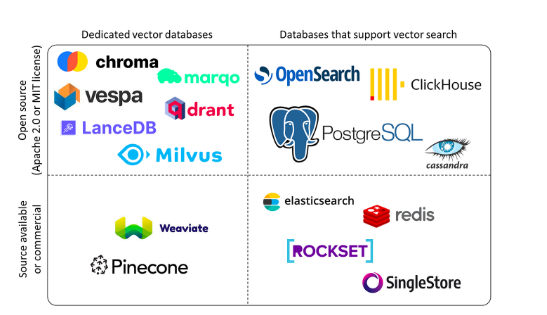

In [ ]:
#Setting up a chroma vector database

from langchain_openai import OpenAIEmbeddings
from langchain_chroma import Chroma

embedding_function = OpenAIEmbeddings(api_key=openai_api_key, model='text-embedding-3-small')

vectorstore = Chroma.from_documents(
    docs,
    embedding=embedding_function,
    persist_directory="path/to/direcctory"
)

# to integrate with oher lanagchain components

retriever= vectorstore.as_retrieve(
    search_type="similarity",
    search_kwargs={"k":2}
)


# Chaining all together

from langchain_core.runnables import RunnablePassthrough

rag_chain = ({"guidelines": retriever, "copy": RunnablePassthrough()}
             | prompt_template
             |llm)
response = rag_chain.invoke("Here at techstack, ourusers are the best n the world!")
print(response.content)

# Add placeholders to the message string
message = """
Answer the following question using the context provided:

Context:
{context}

Question:
{question}

Answer:
"""

# Create a chat prompt template from the message string
prompt_template = ChatPromptTemplate.from_messages([("human", message)])